In [3]:
import matplotlib.pyplot as plt #melakukan import library matplotlib.pyplot sebagai plt
import numpy as np #melakukan import library numpy sebagai np
import cv2 as cv #melakukan import library cv2 sebagai cv

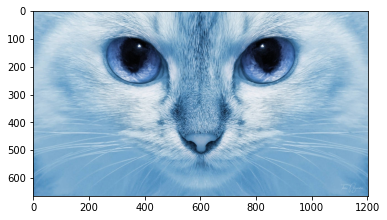

In [4]:
img = plt.imread("image.jpg") #mengimport citra dan ditampung pada variabel img
plt.imshow(img) #menampilkan citra pada variabel img

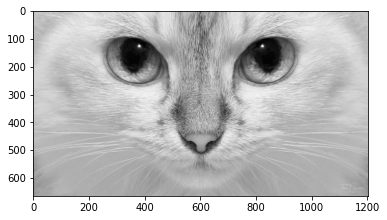

In [5]:
grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #mengonversi citra dari rgb ke grayscale
plt.imshow(grayImg, cmap='gray') #menampilkan citra yang telah di konversi 

In [6]:
#menginisialisasi filter
low_d = np.array([0.7071067811865476, 0.7071067811865476])
high_d = np.array([-0.7071067811865476, 0.7071067811865476])
low_r = np.array([0.7071067811865476, 0.7071067811865476])
high_r = np.array([0.7071067811865476, -0.7071067811865476])

In [7]:
#membuat fungsi untuk melakukan paddding pada citra
def padding(img, pad_w):
    pad_w = len(pad_w)-1
    padding = np.pad(img, [0, pad_w], 'constant')

    return padding


In [8]:
def konvRow(img, pad, filter):
    row, col = img.shape
    konv = np.zeros((row, col))
    for i in range(row):
        for j in range (col):
            for k in range(len(filter)):
                konv[i][j] += (pad[i][j+k]*filter[k])
    
    return konv


In [9]:
def konvCol(img, pad, filter):
    row, col = img.shape
    konv = np.zeros((row, col))
    for i in range(row):
        for j in range (col):
            for k in range(len(filter)):
                konv[i][j] += (pad[i+k][j]*filter[k])
    
    return konv

In [10]:
def downCol(img_konv):
    row, col = img_konv.shape
    row = int(row)
    col = int(col/2)
    even = np.zeros([row, col])
    for i in range(row):
        a = 0
        for j in range(col):
            even[i][j] = img_konv[i][a]
            a += 2
    
    return even


In [11]:
def downRow(img_konv):
    row, col = img_konv.shape
    row = int(row/2)
    col = int(col)
    even = np.zeros((row, col))
    a = 0
    for i in range(row):
        for j in range(col):
            even[i][j] = img_konv[a][j]
        a += 2
    return even



In [12]:
def decom(img, f1, f2):
    pad = padding(img, f1)
    konvolusi = konvRow(img, pad, f1)
    downSamp = downCol(konvolusi)
    padd = padding(downSamp, f2)
    konvo = konvCol(downSamp, padd, f2)

    return downRow(konvo)


In [13]:
A = decom(grayImg, low_d, low_d)
dH = decom(grayImg, low_d, high_d)
dV = decom(grayImg, high_d, low_d)
dD = decom(grayImg, high_d, high_d)

In [14]:
def lvOne(ll, lh, hl, hh):
    row_1 = np.concatenate((ll, hl), axis = 1)
    row_2 = np.concatenate((lh, hh), axis = 1)

    return np.concatenate((row_1, row_2), axis = 0)


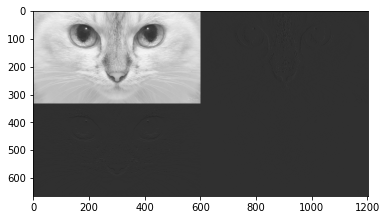

In [15]:
result = lvOne(A, dH, dV, dD)
plt.imshow(result, cmap='gray')

In [16]:
def Show(a, b, c, d):
    plt.figure(figsize=(25,30))
    plt.subplot(1,4,1)
    plt.imshow(a, cmap='gray')
    plt.subplot(1,4,2)
    plt.imshow(b, cmap='gray')
    plt.subplot(1,4,3)
    plt.imshow(c, cmap='gray')
    plt.subplot(1,4,4)
    plt.imshow(d, cmap='gray')

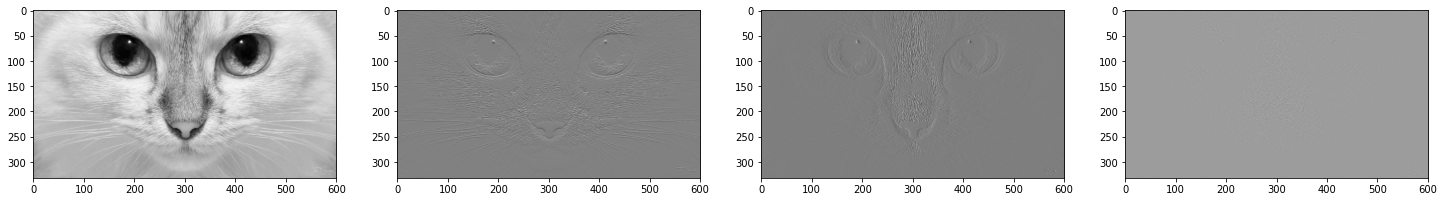

In [17]:
Show(A, dH, dV, dD)

In [20]:
def rekonstruksi(img, dV, dH, dD):
    row, col = img.shape
    bar = row*2
    kol = col*2
    result = np.zeros([bar, kol])
    LL = np.zeros([bar, kol])
    LH = np.zeros([bar, kol])
    HL = np.zeros([bar, kol])
    HH = np.zeros([bar, kol])

    for i in range (0, bar, 2):
        for j in range(0, kol, 2):
            LL[i,j] = img[int(i/2), int(j/2)]
            LH[i,j] = dV[int(i/2), int(j/2)]
            HL[i,j] = dH[int(i/2), int(j/2)]
            HH[i,j] = dD[int(i/2), int(j/2)]

    for i in range (1, bar, 2):
        for j in range (kol):
            LL[i,j] = LL[i-1,j]
            LH[i,j] -= LH[i-1,j]
            HL[i,j] = HL[i-1,j]
            HH[i,j] -= HH[i-1,j]

    for i in range (bar, ):
        for j in range (1, kol, 2):
            LL[i,j] = LL[i,j-1]
            LH[i,j] = LH[i,j-1]
            HL[i,j] -= HL[i,j-1]
            HH[i,j] -= HH[i,j-1]

    for i in range(bar):
        for j in range(kol):
            result[i][j] += (LL[i][j]+LH[i][j]+HL[i][j]+HH[i][j])

    return result

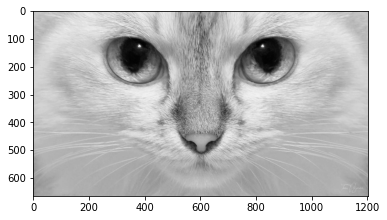

In [22]:
rekImg = rekonstruksi(A, dV, dH, dD) 
plt.imshow(rekImg, cmap='gray')